In [128]:
import plotly.express as px
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, r_regression
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import make_scorer
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv("/Users/arinakcura/Downloads/global-data-on-sustainable-energy.csv")
df

,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),...,Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Density(P/Km2),Land Area(Km2),Latitude,Longitude
0,Afghanistan,2000,1.613591,6.2,9.22,20000.0,44.99,0.16,0.0,0.31,...,302.59482,1.64,760.000000,NaN,NaN,NaN,60,652230.0,33.939110,67.709953
1,Afghanistan,2001,4.074574,7.2,8.86,130000.0,45.60,0.09,0.0,0.50,...,236.89185,1.74,730.000000,NaN,NaN,NaN,60,652230.0,33.939110,67.709953
2,Afghanistan,2002,9.409158,8.2,8.47,3950000.0,37.83,0.13,0.0,0.56,...,210.86215,1.40,1029.999971,NaN,NaN,179.426579,60,652230.0,33.939110,67.709953
3,Afghanistan,2003,14.738506,9.5,8.09,25970000.0,36.66,0.31,0.0,0.63,...,229.96822,1.40,1220.000029,NaN,8.832278,190.683814,60,652230.0,33.939110,67.709953
4,Afghanistan,2004,20.064968,10.9,7.75,NaN,44.24,0.33,0.0,0.56,...,204.23125,1.20,1029.999971,NaN,1.414118,211.382074,60,652230.0,33.939110,67.709953
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3644,Zimbabwe,2016,42.561730,29.8,62.88,30000.0,81.90,3.50,0.0,3.32,...,3227.68020,10.00,11020.000460,NaN,0.755869,1464.588957,38,390757.0,-19.015438,29.154857
3645,Zimbabwe,2017,44.178635,29.8,62.33,5570000.0,82.46,3.05,0.0,4.30,...,3068.01150,9.51,10340.000150,NaN,4.709492,1235.189032,38,390757.0,-19.015438,29.154857
3646,Zimbabwe,2018,45.572647,29.9,82.53,10000.0,80.23,3.73,0.0,5.46,...,3441.98580,9.83,12380.000110,NaN,4.824211,1254.642265,38,390757.0,-19.015438,29.154857
3647,Zimbabwe,2019,46.781475,30.1,81.40,250000.0,81.50,3.66,0.0,4.58,...,3003.65530,10.47,11760.000230,NaN,-6.144236,1316.740657,38,390757.0,-19.015438,29.154857


In [129]:
df.describe()

,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Land Area(Km2),Latitude,Longitude
count,3649.000000,3639.000000,3480.000000,2718.000000,1.560000e+03,3455.000000,3628.000000,3523.000000,3628.000000,3607.000000,3649.000000,3442.000000,3.221000e+03,1512.000000,3332.000000,3367.000000,3.648000e+03,3648.000000,3648.000000
mean,2010.038367,78.933702,63.255287,113.137498,9.422400e+07,32.638165,70.365003,13.450190,23.968010,36.801182,25743.981745,5.307345,1.598665e+05,11.986707,3.441610,13283.774348,6.332135e+05,18.246388,14.822695
std,6.054228,30.275541,39.043658,244.167256,2.981544e+08,29.894901,348.051866,73.006623,104.431085,34.314884,34773.221366,3.532020,7.736611e+05,14.994644,5.686720,19709.866716,1.585519e+06,24.159232,66.348148
min,2000.000000,1.252269,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.110000,1.000000e+01,0.000000,-62.075920,111.927225,2.100000e+01,-40.900557,-175.198242
25%,2005.000000,59.800890,23.175000,3.540000,2.600000e+05,6.515000,0.290000,0.000000,0.040000,2.877847,3116.737300,3.170000,2.020000e+03,2.137095,1.383302,1337.813437,2.571300e+04,3.202778,-11.779889
50%,2010.000000,98.361570,83.150000,32.910000,5.665000e+06,23.300000,2.970000,0.000000,1.470000,27.865068,13120.570000,4.300000,1.050000e+04,6.290766,3.559855,4578.633208,1.176000e+05,17.189877,19.145136
75%,2015.000000,100.000000,100.000000,112.210000,5.534750e+07,55.245000,26.837500,0.000000,9.600000,64.403792,33892.780000,6.027500,6.058000e+04,16.841638,5.830099,15768.615365,5.131200e+05,38.969719,46.199616
max,2020.000000,100.000000,100.000000,3060.190000,5.202310e+09,96.040000,5184.130000,809.410000,2184.940000,100.000010,262585.700000,32.570000,1.070722e+07,86.836586,123.139555,123514.196700,9.984670e+06,64.963051,178.065032


(176, 4)


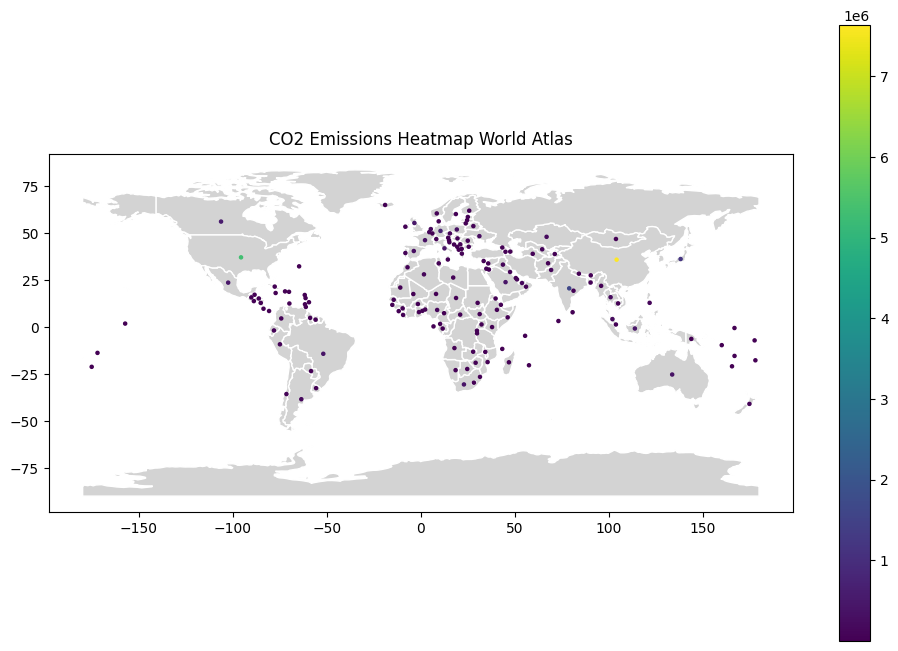

In [130]:
fig, ax = plt.subplots(figsize=(12, 8))

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

world.plot(ax=ax, edgecolor='white', facecolor='lightgray')

new_df = df.groupby('Entity')['Value_co2_emissions_kt_by_country'].mean().reset_index()

lat = df.groupby('Entity')['Latitude'].mean().reset_index()
lat = lat.drop(["Entity"], axis = 1)
new_df = pd.concat([new_df, lat], axis=1, ignore_index=True)

long = df.groupby('Entity')['Longitude'].mean().reset_index()
long = long.drop(["Entity"], axis = 1)
new_df = pd.concat([new_df, long], axis=1, ignore_index=True)

print(new_df.shape)

columns = ['Entity', 'Value_co2_emissions_kt_by_country', 'Latitude', 'Longitude']

column_names = list(new_df.columns[:len(new_df.columns) - len(columns)]) + list(columns)
new_df.columns = column_names

gdf = gpd.GeoDataFrame(new_df, geometry=gpd.points_from_xy(new_df.Longitude, new_df.Latitude))


scatter = gdf.plot(ax=ax, marker='o', column='Value_co2_emissions_kt_by_country', markersize=5, legend = True, cmap='viridis')

scatter.set_label
plt.title("CO2 Emissions Heatmap World Atlas")


plt.show()


In [131]:
numeric_columns = df.select_dtypes(include=['number']).columns
df[numeric_columns] = df.groupby("Entity")[numeric_columns].fillna(df[numeric_columns].median())
feature1 = df.groupby('Entity')['Access to electricity (% of population)'].mean().reset_index()
agg_df = feature1

columns = ['Access to clean fuels for cooking', 'Renewable-electricity-generating-capacity-per-capita', 'Financial flows to developing countries (US $)',	
          'Renewable energy share in the total final energy consumption (%)', 'Electricity from fossil fuels (TWh)','Electricity from nuclear (TWh)', 'Electricity from renewables (TWh)', 'Low-carbon electricity (% electricity)',	
          'Primary energy consumption per capita (kWh/person)', 'Energy intensity level of primary energy (MJ/$2017 PPP GDP)', 'Value_co2_emissions_kt_by_country',	'Renewables (% equivalent primary energy)', 'gdp_growth',
         'gdp_per_capita']

for column in columns:
    feature = df.groupby('Entity')[column].mean().reset_index()
    feature = feature.drop(["Entity"], axis = 1)
    agg_df = pd.concat([agg_df, feature], axis=1, ignore_index=True)

column_names = list(agg_df.columns[:len(agg_df.columns) - len(columns)]) + list(columns)
agg_df.columns = column_names
agg_df.columns.values[0] = 'Country' 
agg_df.columns.values[1] = 'Access to electricity (% of population)'

countries = agg_df["Country"]
nan_count = agg_df.isnull().sum()
print("Number of NaN values in the dataset:")
print(nan_count)

Number of NaN values in the dataset:
Country                                                             0
Access to electricity (% of population)                             0
Access to clean fuels for cooking                                   0
Renewable-electricity-generating-capacity-per-capita                0
Financial flows to developing countries (US $)                      0
Renewable energy share in the total final energy consumption (%)    0
Electricity from fossil fuels (TWh)                                 0
Electricity from nuclear (TWh)                                      0
Electricity from renewables (TWh)                                   0
Low-carbon electricity (% electricity)                              0
Primary energy consumption per capita (kWh/person)                  0
Energy intensity level of primary energy (MJ/$2017 PPP GDP)         0
Value_co2_emissions_kt_by_country                                   0
Renewables (% equivalent primary energy)             

In [132]:
agg_df.describe()

,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita
count,176.000000,176.000000,176.000000,1.760000e+02,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,1.760000e+02,176.000000,176.000000,176.000000
mean,78.911289,64.064205,95.415023,4.304167e+07,32.077497,69.144739,12.820622,23.558068,36.393716,25582.725524,5.236102,1.406926e+05,8.620924,3.444293,12513.477720
std,29.388958,38.027485,205.052414,8.754862e+07,28.023616,329.745898,70.368039,91.563311,33.208557,34303.492427,3.077513,6.830883e+05,9.822407,1.890351,18081.131365
min,5.218159,0.000000,0.035000,1.734048e+06,1.109524,0.000000,0.000000,0.000000,0.000000,0.000000,0.504762,5.095238e+02,0.003644,-0.240964,206.277491
25%,59.359397,29.208929,18.348214,5.665000e+06,7.683810,0.344643,0.000000,0.102619,3.462543,3066.092319,3.277262,2.776786e+03,6.290766,2.147117,1833.574154
50%,97.712194,83.150000,32.910000,6.439643e+06,23.269524,2.811905,0.000000,1.503333,27.865068,13617.375119,4.329524,1.050000e+04,6.290766,3.457125,4578.633208
75%,100.000000,100.000000,62.582619,3.055244e+07,52.446429,26.599048,0.000000,9.821250,62.509854,33269.878440,5.979048,5.083190e+04,6.290766,4.455034,12274.510036
max,100.000000,100.000000,1747.474762,6.498250e+08,90.443333,3234.634762,790.600476,938.235238,100.000000,215565.206190,20.420476,7.273493e+06,77.355599,9.531750,97804.120900


                 Country  gdp_growth
0            Afghanistan    5.791888
1                Albania    3.859305
2                Algeria    2.885714
3                 Angola    4.945895
4    Antigua and Barbuda    1.515946
..                   ...         ...
171           Uzbekistan    6.253772
172              Vanuatu    2.441195
173                Yemen    3.559855
174               Zambia    5.442444
175             Zimbabwe    0.132669

[176 rows x 2 columns]
(176, 2)


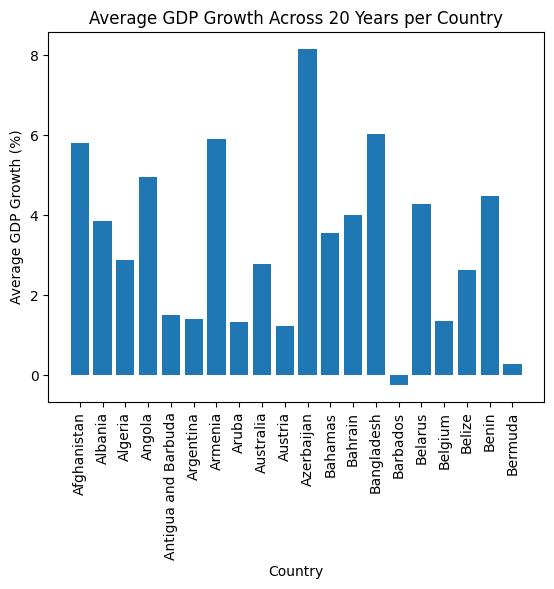

In [133]:
selected_columns = ['Country', 'gdp_growth'] 
avg_gdp_growth = agg_df[selected_columns].copy()
print(avg_gdp_growth)
print(avg_gdp_growth.shape)

subset_countries = avg_gdp_growth['Country'].iloc[:20]  
plt.bar(subset_countries, avg_gdp_growth['gdp_growth'].iloc[:20])

plt.title('Average GDP Growth Across 20 Years per Country')
plt.ylabel('Average GDP Growth (%)')
plt.xlabel('Country')
plt.xticks(rotation = 90)
plt.show()

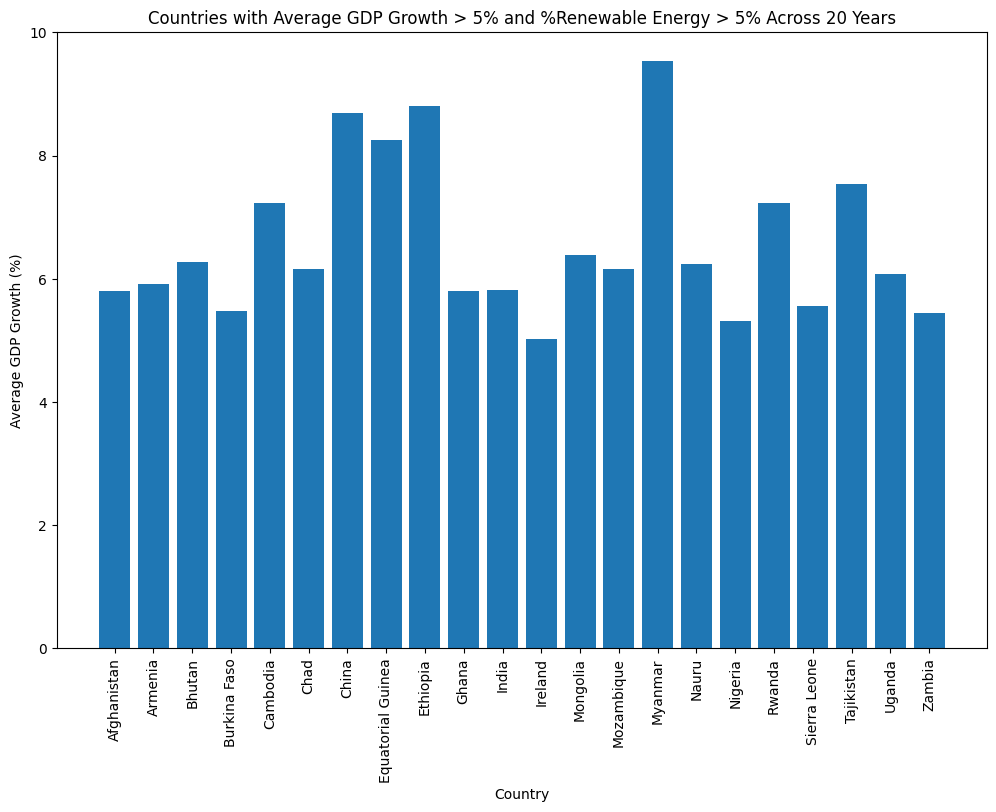

In [134]:
high_growth_countries = avg_gdp_growth[(avg_gdp_growth['gdp_growth'] > 5) & (agg_df["Renewables (% equivalent primary energy)"] > 5)] 

fig, ax = plt.subplots(figsize=(12, 8))

plt.bar(high_growth_countries['Country'], high_growth_countries['gdp_growth'])
plt.title('Countries with Average GDP Growth > 5% and %Renewable Energy > 5% Across 20 Years')
plt.ylabel('Average GDP Growth (%)')
plt.xlabel('Country')
plt.xticks(rotation=90)
plt.show()

Selected feature names: Index(['Access to electricity (% of population)',
       'Access to clean fuels for cooking', 'Electricity from nuclear (TWh)',
       'Primary energy consumption per capita (kWh/person)',
       'Renewables (% equivalent primary energy)'],
      dtype='object')


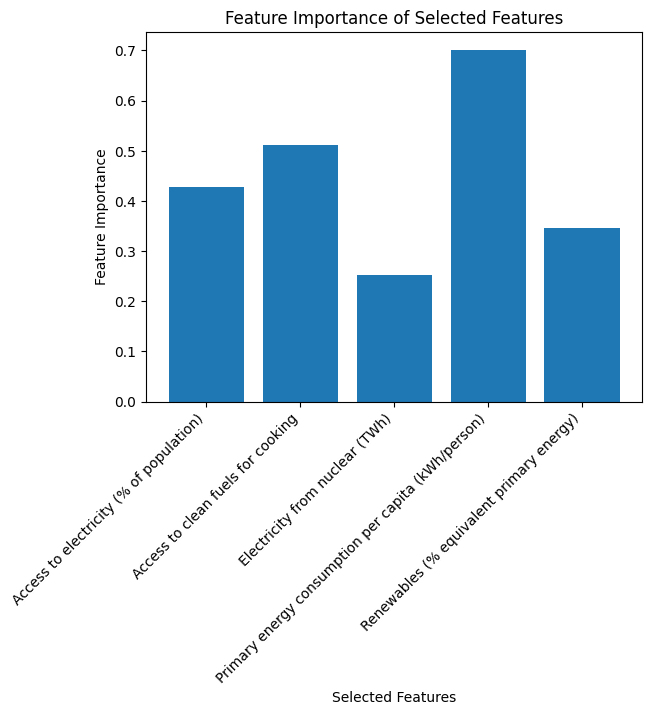

In [135]:
X = agg_df.drop('gdp_per_capita', axis=1)
X = X.drop('Country', axis=1)
y = agg_df['gdp_per_capita']

k = 5

selector = SelectKBest(score_func=r_regression, k=k)

X_selected = selector.fit_transform(X, y)

selected_indices = selector.get_support(indices=True)

selected_feature_names = X.columns[selected_indices]

print("Selected feature names:", selected_feature_names)

feature_importances = selector.scores_
plt.bar(selected_feature_names, feature_importances[selected_indices])
plt.xlabel('Selected Features')
plt.ylabel('Feature Importance')
plt.title('Feature Importance of Selected Features')
plt.xticks(rotation=45, ha='right') 
plt.show()


In [136]:
important_features = ['Access to electricity (% of population)',
       'Access to clean fuels for cooking', 'Electricity from nuclear (TWh)',
       'Primary energy consumption per capita (kWh/person)',
       'Renewables (% equivalent primary energy)']

X = agg_df[important_features]
print(X.shape)
y = agg_df['gdp_per_capita']
print(y.shape)

# Conduct an initial aggregate model using the 20-year means for each country to predict gdp per capita
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42, criterion="squared_error")

rf_regressor.fit(X_train, y_train)

y_pred_rf = rf_regressor.predict(X_test)

r2_rf = mean_squared_error(y_test, y_pred_rf)
print("Mean Squared Error:", r2_rf)
print("R2 Score:", r2_score(y_test, y_pred_rf))

(176, 5)
(176,)
Mean Squared Error: 136339421.06007674
R2 Score: 0.6479202939085291


In [137]:
agg_df[important_features].describe()

,Access to electricity (% of population),Access to clean fuels for cooking,Electricity from nuclear (TWh),Primary energy consumption per capita (kWh/person),Renewables (% equivalent primary energy)
count,176.000000,176.000000,176.000000,176.000000,176.000000
mean,78.911289,64.064205,12.820622,25582.725524,8.620924
std,29.388958,38.027485,70.368039,34303.492427,9.822407
min,5.218159,0.000000,0.000000,0.000000,0.003644
25%,59.359397,29.208929,0.000000,3066.092319,6.290766
50%,97.712194,83.150000,0.000000,13617.375119,6.290766
75%,100.000000,100.000000,0.000000,33269.878440,6.290766
max,100.000000,100.000000,790.600476,215565.206190,77.355599


In [138]:
countries = set(df["Entity"])
scores = pd.DataFrame(index=list(countries), columns = ['r2_score', 'mean absolute error'])
country_dict = {}
true_dict = {}
r2_vals = {}
scaler = StandardScaler()
for country in countries:
    country_dict[country] = []
    true_dict[country] = []
    r2_vals[country] = []
for country in countries:
    # Conduct necessary data preprocessing and feature transformation to run model on each country over 20 years. General scaffold used for each regression type
    df_dumb = df[(df["Entity"] == country)]
    df_dumb = df_dumb[important_features + ['gdp_per_capita']]
    df_dumb.dropna(subset=["gdp_per_capita"], inplace=True)
    df_dumb[important_features] = df_dumb[important_features].fillna(df_dumb[important_features].mean())
    df_dumb.dropna(inplace=True, axis = 1)
    df_dumb[important_features] = scaler.fit_transform(df_dumb[important_features])
    X = df_dumb.drop("gdp_per_capita", axis = 1)
    y = df_dumb["gdp_per_capita"]
    if (len(df_dumb) > 10):
        nan_count = y.isnull().sum()
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

        rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42, criterion="absolute_error")

        rf_regressor.fit(X_train, y_train)
        y_pred = rf_regressor.predict(X_test)
        country_dict[country].append(y_pred)
        true_dict[country].append(y_test)
        r2_rf = mean_absolute_error(y_test, y_pred)
        r2_vals[country].append(r2_score(y_test, y_pred))
        scores.at[country, 'r2_score']  = r2_score(y_test, y_pred)
        scores.at[country, 'mean absolute error'] = r2_rf 
          

In [139]:
scores.mean()

r2_score                  0.631826
mean absolute error    1909.779978
dtype: object

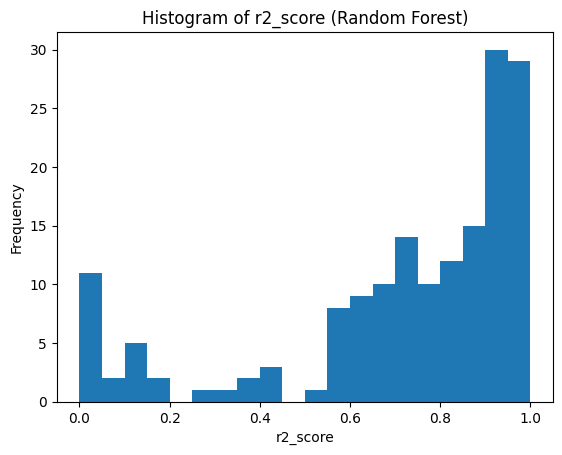

Number of values above 0.8: 172


In [140]:
plt.hist(scores['r2_score'].astype('float32'), bins=20, range=(0, 1))
plt.xlabel('r2_score')
plt.ylabel('Frequency')
plt.title('Histogram of r2_score (Random Forest)')
plt.show()


count_above = scores[scores['r2_score'] > 0.8].size
print(f"Number of values above 0.8: {count_above}")

In [141]:
average_r2_per_country = {}
for country, r2_values in r2_vals.items():
    if (len(r2_values) > 0):
        average_r2 = sum(r2_values) / len(r2_values)
        average_r2_per_country[country] = average_r2
    


max_country = max(average_r2_per_country, key=average_r2_per_country.get)
max_average_r2 = average_r2_per_country[max_country]


print(f"The country with the highest R2 Score for Random Forest Regressor is {max_country} with an average R2 of {max_average_r2}")


The country with the highest R2 Score for Random Forest Regressor is Somalia with an average R2 of 0.9958065670005951


<module 'matplotlib.pyplot' from '/Users/arinakcura/Library/Python/3.9/lib/python/site-packages/matplotlib/pyplot.py'>

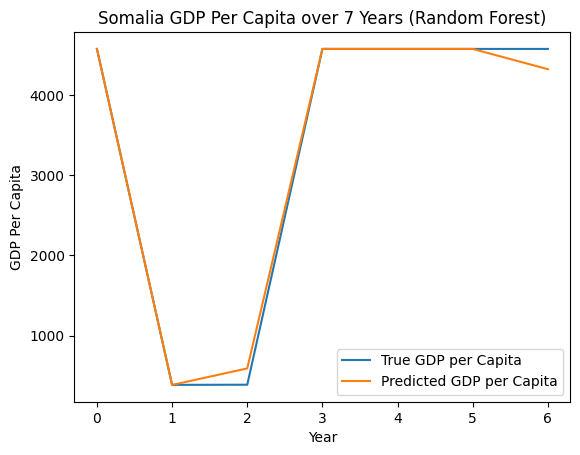

In [142]:
country_true = list(true_dict['Somalia'][0])

y_pred = country_dict['Somalia'][0]
y_true = country_true

plt.plot(y_true, label='True GDP per Capita')
plt.plot(y_pred, label='Predicted GDP per Capita')
plt.xlabel('Year')
plt.ylabel("GDP Per Capita")
plt.title('Somalia GDP Per Capita over 7 Years (Random Forest)')
plt.legend()
plt

In [143]:
scoring = make_scorer('r2_score')
countries = set(df["Entity"])
scores_ridge = pd.DataFrame(index=list(countries), columns = ['r2_score', 'mean absolute error'])
country_dict_cv = {}
true_dict_cv = {}
r2_vals_cv = {}
scaler = StandardScaler()
for country in countries:
    country_dict_cv[country] = []
    true_dict_cv[country] = []
    r2_vals_cv[country] = []
for country in countries:
    df_dumb = df[(df["Entity"] == country)]
    df_dumb = df_dumb[important_features + ['gdp_per_capita']]
    df_dumb.dropna(subset=["gdp_per_capita"], inplace=True)
    df_dumb[important_features] = df_dumb[important_features].fillna(df_dumb[important_features].mean())
    df_dumb.dropna(inplace=True, axis = 1)
    df_dumb[important_features] = scaler.fit_transform(df_dumb[important_features])
    X = df_dumb.drop("gdp_per_capita", axis = 1)
    y = df_dumb["gdp_per_capita"]
    if (len(df_dumb) > 10):
        nan_count = y.isnull().sum()
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

        rlf = RidgeCV(alphas = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100], cv = 5, scoring=scoring)
        
        rlf.fit(X_train, y_train)

        y_pred_rlf = rlf.predict(X_test)
        country_dict_cv[country].append(y_pred_rlf)
        true_dict_cv[country].append(y_test)
        r2_rf = mean_absolute_error(y_test, y_pred_rlf)
        r2_vals_cv[country].append(r2_score(y_test, y_pred_rlf))
        scores_ridge.at[country, 'r2_score']  = r2_score(y_test, y_pred_rlf) 
        scores_ridge.at[country, 'mean absolute error']  = r2_rf



In [144]:
average_r2_per_country = {}
for country, r2_values in r2_vals_cv.items():
    if (len(r2_values) > 0):
        if ((sum(r2_values) / len(r2_values)) != 1):
            average_r2 = sum(r2_values) / len(r2_values)
            average_r2_per_country[country] = average_r2
    
    


max_country = max(average_r2_per_country, key=average_r2_per_country.get)
max_average_r2 = average_r2_per_country[max_country]


print(f"The country with the highest R2 Score for Ridge Regression is {max_country} with an average R2 of {max_average_r2}")

The country with the highest R2 Score for Ridge Regression is Ecuador with an average R2 of 0.9957250031538079


In [145]:
scores_ridge.mean()

r2_score                  0.455329
mean absolute error    2217.423764
dtype: object

<module 'matplotlib.pyplot' from '/Users/arinakcura/Library/Python/3.9/lib/python/site-packages/matplotlib/pyplot.py'>

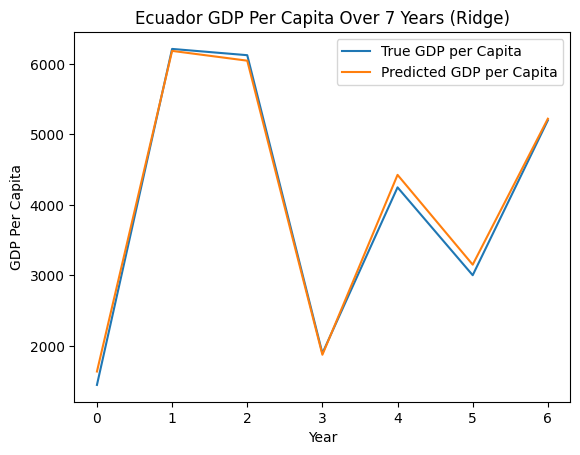

In [146]:
country_true = list(true_dict_cv['Ecuador'][0])

y_pred = country_dict_cv['Ecuador'][0]
y_true = country_true

plt.plot(y_true, label='True GDP per Capita')
plt.plot(y_pred, label='Predicted GDP per Capita')
plt.xlabel('Year')
plt.ylabel('GDP Per Capita')
plt.title('Ecuador GDP Per Capita Over 7 Years (Ridge)')
plt.legend()
plt

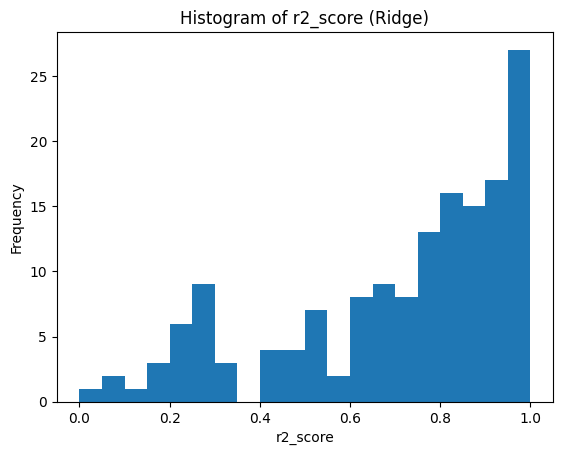

Number of values above 0.8: 150


In [147]:
plt.hist(scores_ridge['r2_score'].astype('float32'), bins=20, range=(0, 1))
plt.xlabel('r2_score')
plt.ylabel('Frequency')
plt.title('Histogram of r2_score (Ridge)')
plt.show()

count_above = scores_ridge[scores_ridge['r2_score'] > 0.8].size
print(f"Number of values above 0.8: {count_above}")

In [148]:
scoring = make_scorer('r2_score')
countries = set(df["Entity"])
scores_lasso = pd.DataFrame(index=list(countries), columns = ['r2_score', 'mean absolute error'])
lasso_country_dict_cv = {}
lasso_true_dict_cv = {}
lasso_r2_vals_cv = {}
scaler = StandardScaler()
for country in countries:
    lasso_country_dict_cv[country] = []
    lasso_true_dict_cv[country] = []
    lasso_r2_vals_cv[country] = []
for country in countries:
    df_dumb = df[(df["Entity"] == country)]
    df_dumb = df_dumb[important_features + ['gdp_per_capita']]
    df_dumb.dropna(subset=["gdp_per_capita"], inplace=True)
    df_dumb[important_features] = df_dumb[important_features].fillna(df_dumb[important_features].mean())
    df_dumb.dropna(inplace=True, axis = 1)
    df_dumb[important_features] = scaler.fit_transform(df_dumb[important_features])
    X = df_dumb.drop("gdp_per_capita", axis = 1)
    y = df_dumb["gdp_per_capita"]
    if (len(df_dumb) > 10):
        nan_count = y.isnull().sum()
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

        lrf = LassoCV(alphas = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100], cv = 5)
        
        lrf.fit(X_train, y_train)

        y_pred_lrf = rlf.predict(X_test)
        lasso_country_dict_cv[country].append(y_pred_lrf)
        lasso_true_dict_cv[country].append(y_test)
        lasso_r2_vals_cv[country].append(r2_score(y_test, y_pred_lrf))
        scores_lasso.at[country, 'r2_score']  = r2_score(y_test, y_pred_lrf)
        scores_lasso.at[country, 'mean absolute error']  = mean_absolute_error(y_test, y_pred_lrf)  


In [149]:
scores_lasso.mean()

r2_score              -13444.302779
mean absolute error    35198.264806
dtype: object

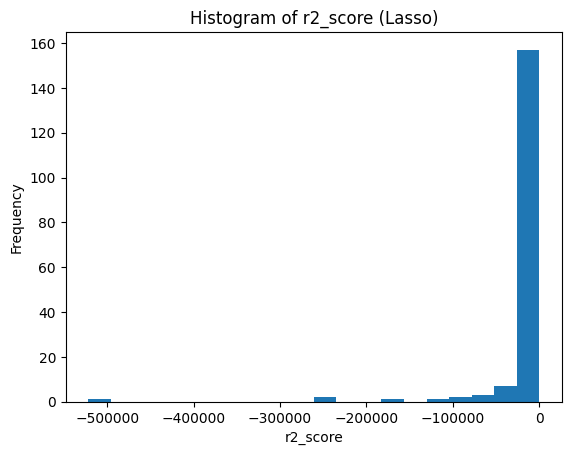

Number of values above 0.8: 0


In [150]:
plt.hist(scores_lasso['r2_score'].astype('float32'), bins=20)
plt.xlabel('r2_score')
plt.ylabel('Frequency')
plt.title('Histogram of r2_score (Lasso)')
plt.show()


count_above = scores_lasso[scores_lasso['r2_score'] > 0.8].size
print(f"Number of values above 0.8: {count_above}")

In [151]:
average_r2_per_country = {}
for country, r2_values in lasso_r2_vals_cv.items():
    if (len(r2_values) > 0):
        if ((sum(r2_values) / len(r2_values)) != 1):
            average_r2 = sum(r2_values) / len(r2_values)
            average_r2_per_country[country] = average_r2
    

max_country = max(average_r2_per_country, key=average_r2_per_country.get)
max_average_r2 = average_r2_per_country[max_country]


print(f"The country with the highest R2 Score for Lasso Regression is {max_country} with an average R2 of {max_average_r2}")

The country with the highest R2 Score for Lasso Regression is Singapore with an average R2 of 0.7330892032976071


<module 'matplotlib.pyplot' from '/Users/arinakcura/Library/Python/3.9/lib/python/site-packages/matplotlib/pyplot.py'>

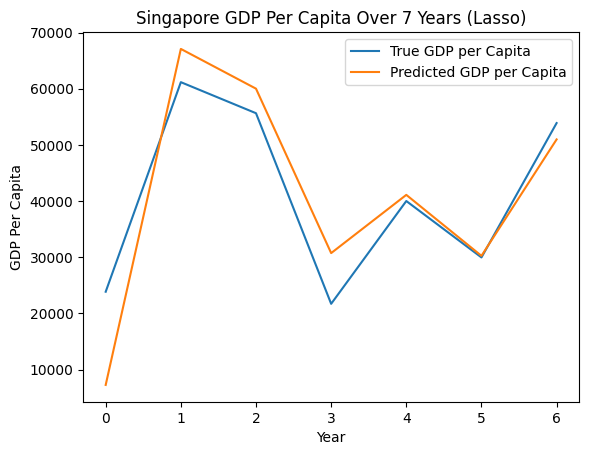

In [152]:
country_true = list(lasso_true_dict_cv['Singapore'][0])

y_pred = lasso_country_dict_cv['Singapore'][0]
y_true = country_true


plt.plot(y_true, label='True GDP per Capita')
plt.plot(y_pred, label='Predicted GDP per Capita')
plt.xlabel('Year')
plt.ylabel('GDP Per Capita')
plt.title('Singapore GDP Per Capita Over 7 Years (Lasso)')
plt.legend()
plt